Exercice - Cat vs Dog

In [3]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.datasets import make_blobs # type: ignore

In [4]:
from utilities import *

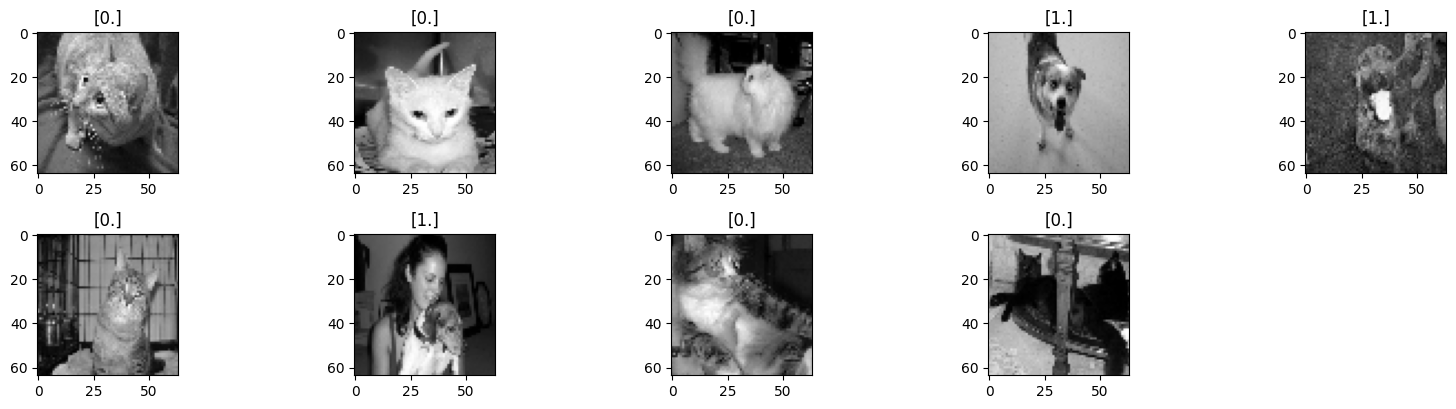

In [5]:
X_train, y_train, X_test, y_test = load_data()
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [6]:
#print(X_train.shape)
#print(y_train.shape)
#print(np.unique(y_train, return_counts=True))
#print(np.unique(X_train, return_counts=True))

In [7]:
#print(X_test.shape)
#print(y_test.shape)
#print(np.unique(y_test, return_counts=True))
#print(np.unique(X_test, return_counts=True))

In [8]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

In [9]:
print(X_train_reshape.shape)
print(y_train.shape)
#print(np.unique(X, return_counts=True))

(1000, 4096)
(1000, 1)


In [10]:
print(X_test_reshape.shape)
print(y_test.shape)
#print(np.unique(X_test, return_counts=True))

(200, 4096)
(200, 1)


2. Fonctions du modèle

In [11]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.rand(1)
    return (W, b)

In [12]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [13]:
#def log_loss(A, y):
#    epsilon = 1e-15
#    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [14]:
def gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [15]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [16]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm

In [18]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.01, n_iter = 10000):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)): # tqdm pour barre de progression
        A = model(X_train, W, b)

        if i %10 == 0: # On effectue beaucoup d'ittération donc on effectue les calculs de loss/acc 1 fois sur 10
            # Train
            train_loss.append(log_loss(y_train, A))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(y_test, A_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

100%|██████████| 10000/10000 [00:41<00:00, 243.68it/s]


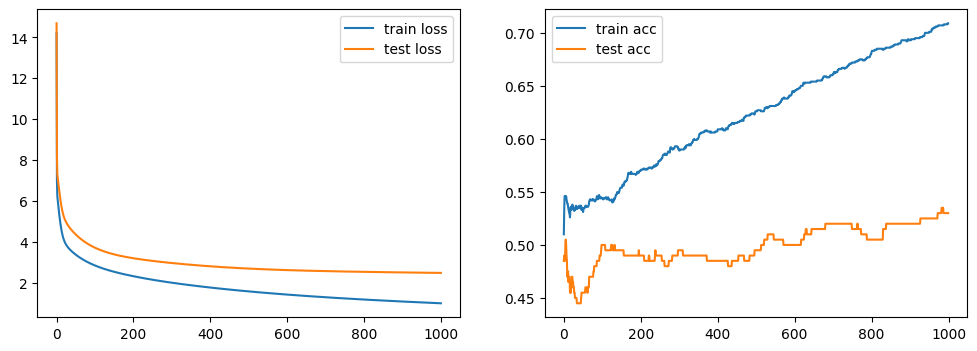

In [19]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test)